In [25]:
import pandas as pd
from datetime import timedelta
from binance.client import Client

api = 'Z0ITlKtBapUWeVbZpUCr80YemOkH7AMHKEwHFLdQy5JA8WZG9Ndlw6HudPwJPIvh'
secret = '0wQwHxsIVy0JToIXsBhmYfNDP7saGoaqADdGodwwZguPYLCAhfDHQDneZcYYwGdH'
client = Client(api, secret)

In [28]:
def spots_historical_data(symbol, interval, start_time, end_time):
    try:
        df = pd.DataFrame(client.get_historical_klines(symbol, interval, start_time, end_time))
        if df.empty:
            print(f"No data returned for {symbol}")
            return pd.DataFrame()
        df = df.iloc[:, 0:6]
        df.columns = ['date', 'open', 'high', 'low', 'close', 'volume']
        df['date'] = pd.to_datetime(df['date'], unit='ms') + timedelta(hours=7)
        df['ticker'] = symbol
        return df[:-1]
    except Exception as e:
        print(f"Error fetching spot data for {symbol}: {e}")
        return pd.DataFrame()

In [49]:
df = spots_historical_data('BTCUSDT', Client.KLINE_INTERVAL_1HOUR, '2008-01-01', '2024-08-12')
df

,date,open,high,low,close,volume,ticker
0,2017-08-17 11:00:00,4261.48000000,4313.62000000,4261.32000000,4308.83000000,47.18100900,BTCUSDT
1,2017-08-17 12:00:00,4308.83000000,4328.69000000,4291.37000000,4315.32000000,23.23491600,BTCUSDT
2,2017-08-17 13:00:00,4330.29000000,4345.45000000,4309.37000000,4324.35000000,7.22969100,BTCUSDT
3,2017-08-17 14:00:00,4316.62000000,4349.99000000,4287.41000000,4349.99000000,4.44324900,BTCUSDT
4,2017-08-17 15:00:00,4333.32000000,4377.85000000,4333.32000000,4360.69000000,0.97280700,BTCUSDT
...,...,...,...,...,...,...,...
61111,2024-08-12 02:00:00,60263.11000000,60274.94000000,59542.57000000,59621.11000000,1189.87128000,BTCUSDT
61112,2024-08-12 03:00:00,59621.11000000,59674.38000000,58286.73000000,58504.92000000,3007.44807000,BTCUSDT
61113,2024-08-12 04:00:00,58504.91000000,59087.00000000,58317.00000000,59009.80000000,1293.05151000,BTCUSDT
61114,2024-08-12 05:00:00,59009.79000000,59349.04000000,58525.08000000,58996.00000000,1493.92484000,BTCUSDT


In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Libraries for Deep Learning Models
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from keras.optimizers import SGD

In [119]:
df = pd.read_csv('btc_spots_1hour.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df

,open,high,low,close,volume
date,,,,,
2017-08-17 11:00:00,4261.48,4313.62,4261.32,4308.83,47.181009
2017-08-17 12:00:00,4308.83,4328.69,4291.37,4315.32,23.234916
2017-08-17 13:00:00,4330.29,4345.45,4309.37,4324.35,7.229691
2017-08-17 14:00:00,4316.62,4349.99,4287.41,4349.99,4.443249
2017-08-17 15:00:00,4333.32,4377.85,4333.32,4360.69,0.972807
...,...,...,...,...,...
2024-08-12 02:00:00,60263.11,60274.94,59542.57,59621.11,1189.871280
2024-08-12 03:00:00,59621.11,59674.38,58286.73,58504.92,3007.448070
2024-08-12 04:00:00,58504.91,59087.00,58317.00,59009.80,1293.051510


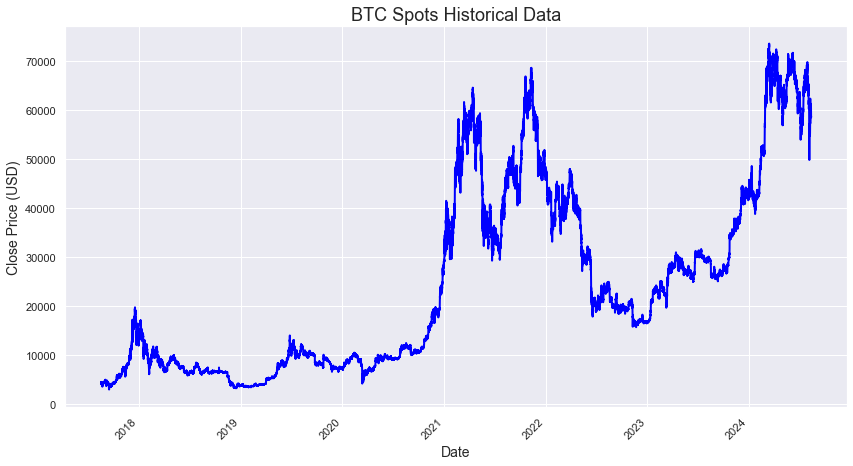

In [120]:
plt.figure(figsize=(14, 7))
plt.plot(df['close'], color='blue', linewidth=2)

plt.title("BTC Spots Historical Data", fontsize=18)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Close Price (USD)", fontsize=14)

plt.xticks(rotation=45, ha='right')

plt.grid(True)

plt.show()

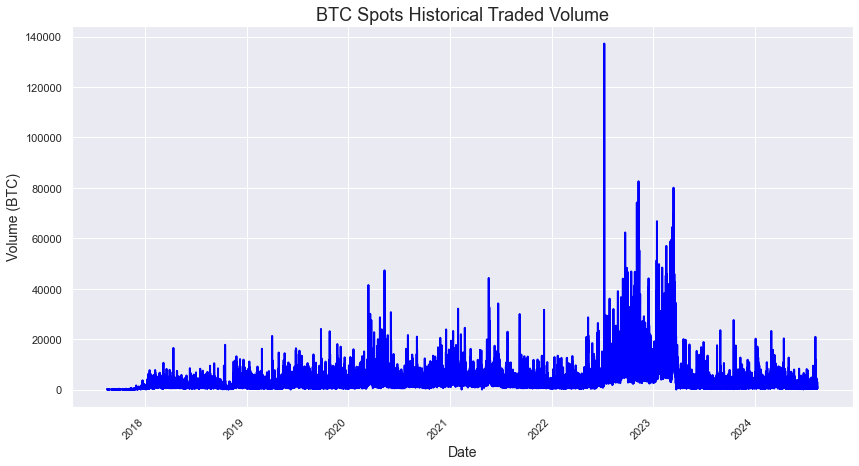

In [121]:
plt.figure(figsize=(14, 7))
plt.plot(df['volume'], color='blue', linewidth=2)

plt.title("BTC Spots Historical Traded Volume", fontsize=18)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Volume (BTC)", fontsize=14)

plt.xticks(rotation=45, ha='right')

plt.grid(True)

plt.show()

In [123]:
df['short_mavg'] = df['close'].rolling(window=10, min_periods=1, center=False).mean()
df['long_mavg'] = df['close'].rolling(window=60, min_periods=1, center=False).mean()
df['signal'] = np.where(df['short_mavg'] > df['long_mavg'], 1.0, 0.0)

In [124]:
#calculation of exponential moving average
def EMA(df, n):
    EMA = pd.Series(df['close'].ewm(span=n, min_periods=n).mean(), name='EMA_' + str(n))
    return EMA
df['EMA10'] = EMA(df, 10)
df['EMA30'] = EMA(df, 30)
df['EMA200'] = EMA(df, 200)

#calculation of rate of change
def ROC(df, n):
    M = df.diff(n - 1)
    N = df.shift(n - 1)
    ROC = pd.Series(((M / N) * 100), name = 'ROC_' + str(n))
    return ROC
df['ROC10'] = ROC(df['close'], 10)
df['ROC30'] = ROC(df['close'], 30)

#Calculation of price momentum
def MOM(df, n):
    MOM = pd.Series(df.diff(n), name='Momentum_' + str(n))
    return MOM
df['MOM10'] = MOM(df['close'], 10)
df['MOM30'] = MOM(df['close'], 30)

#calculation of relative strength index
def RSI(series, period):
 delta = series.diff().dropna()
 u = delta * 0
 d = u.copy()
 u[delta > 0] = delta[delta > 0]
 d[delta < 0] = -delta[delta < 0]
 u[u.index[period-1]] = np.mean( u[:period] ) #first value is sum of avg gains
 u = u.drop(u.index[:(period-1)])
 d[d.index[period-1]] = np.mean( d[:period] ) #first value is sum of avg losses
 d = d.drop(d.index[:(period-1)])
 rs = u.ewm(com=period-1, adjust=False).mean() / \
 d.ewm(com=period-1, adjust=False).mean()
 return 100 - 100 / (1 + rs)
df['RSI10'] = RSI(df['close'], 10)
df['RSI30'] = RSI(df['close'], 30)
df['RSI200'] = RSI(df['close'], 200)

#calculation of stochastic osillator.

def STOK(close, low, high, n):
 STOK = ((close - low.rolling(n).min()) / (high.rolling(n).max() - low.rolling(n).min())) * 100
 return STOK

def STOD(close, low, high, n):
 STOK = ((close - low.rolling(n).min()) / (high.rolling(n).max() - low.rolling(n).min())) * 100
 STOD = STOK.rolling(3).mean()
 return STOD

#Calculation of moving average
def MA(df, n):
    MA = pd.Series(df['close'].rolling(n, min_periods=n).mean(), name='MA_' + str(n))
    return MA

In [125]:
df['%K10'] = STOK(df['close'], df['low'], df['high'], 10)
df['%D10'] = STOD(df['close'], df['low'], df['high'], 10)
df['%K30'] = STOK(df['close'], df['low'], df['high'], 30)
df['%D30'] = STOD(df['close'], df['low'], df['high'], 30)
df['%K200'] = STOK(df['close'], df['low'], df['high'], 200)
df['%D200'] = STOD(df['close'], df['low'], df['high'], 200)
df['MA21'] = MA(df, 10)
df['MA63'] = MA(df, 30)
df['MA252'] = MA(df, 200)

In [130]:
df = df.fillna(0)
df.head()

,open,high,low,close,volume,short_mavg,long_mavg,signal,EMA10,EMA30,...,RSI200,%K10,%D10,%K30,%D30,%K200,%D200,MA21,MA63,MA252
date,,,,,,,,,,,,,,,,,,,,,
2017-08-17 11:00:00,4261.48,4313.62,4261.32,4308.83,47.181009,4308.830000,4308.830000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-17 12:00:00,4308.83,4328.69,4291.37,4315.32,23.234916,4312.075000,4312.075000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-17 13:00:00,4330.29,4345.45,4309.37,4324.35,7.229691,4316.166667,4316.166667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-17 14:00:00,4316.62,4349.99,4287.41,4349.99,4.443249,4324.622500,4324.622500,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-17 15:00:00,4333.32,4377.85,4333.32,4360.69,0.972807,4331.836000,4331.836000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


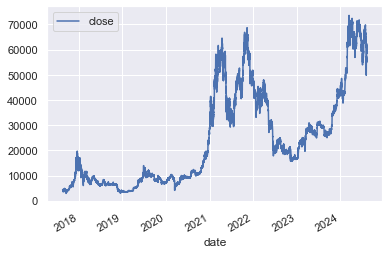

In [131]:
df[['close']].plot(grid=True)
plt.show()

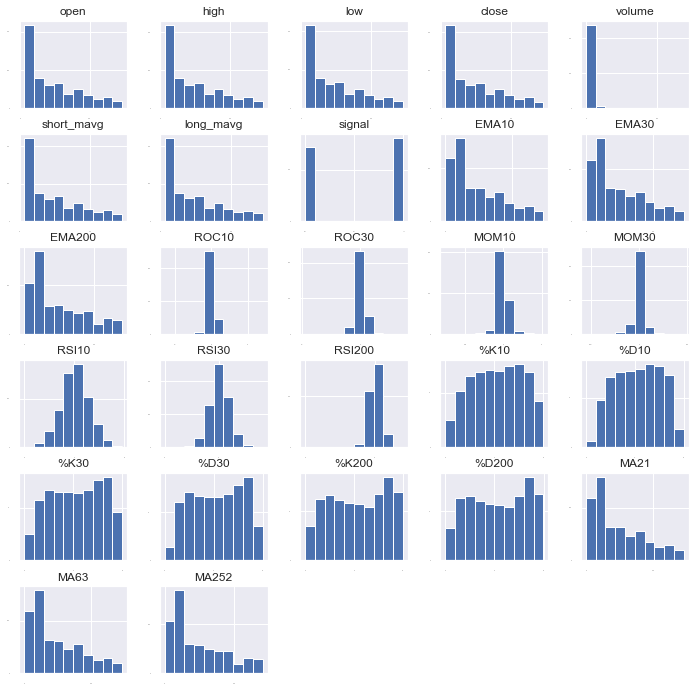

In [132]:
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

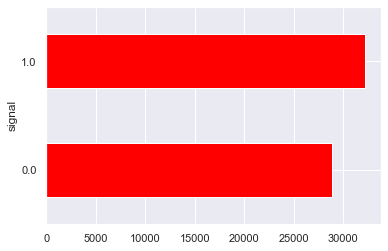

In [133]:
fig = plt.figure()
plot = df.groupby(['signal']).size().plot(kind='barh', color='red')
plt.show()

<Axes: title={'center': 'Correlation Matrix'}>

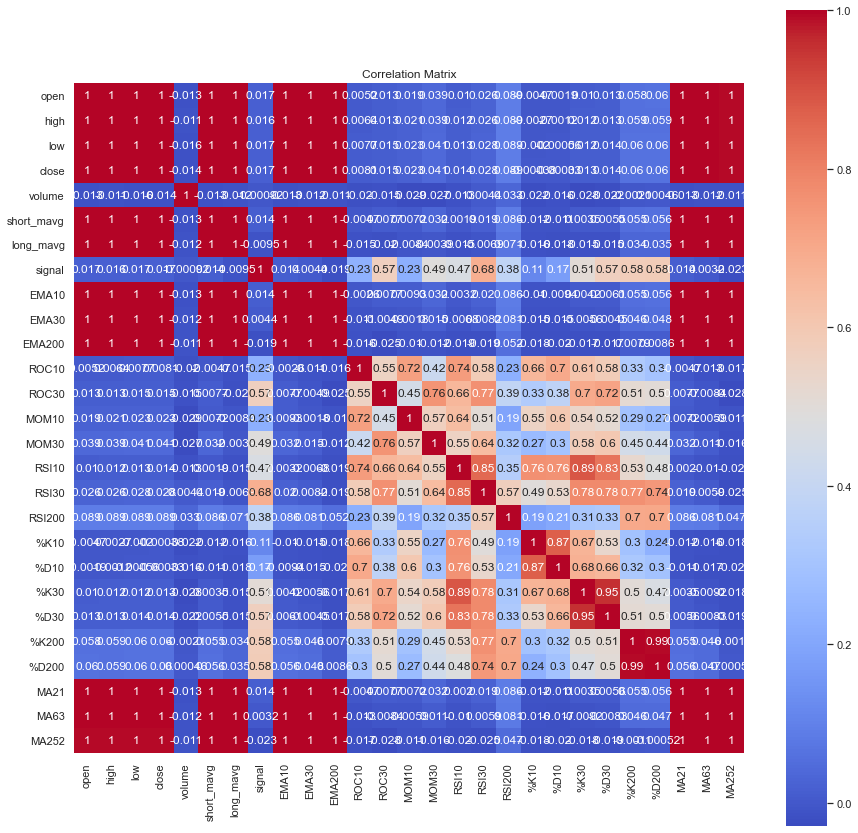

In [134]:
# correlation
correlation = df.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='coolwarm')

In [135]:
df=df.drop(['high','low','open', 'volume','short_mavg','long_mavg'], axis=1)
df.head(5)

,close,signal,EMA10,EMA30,EMA200,ROC10,ROC30,MOM10,MOM30,RSI10,...,RSI200,%K10,%D10,%K30,%D30,%K200,%D200,MA21,MA63,MA252
date,,,,,,,,,,,,,,,,,,,,,
2017-08-17 11:00:00,4308.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-17 12:00:00,4315.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-17 13:00:00,4324.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-17 14:00:00,4349.99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-17 15:00:00,4360.69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
subset_dataset= df.iloc[-100000:]
Y= subset_dataset["signal"]
X = subset_dataset.loc[:, df.columns != 'signal']
validation_size = 0.2
seed = 1
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=1)

In [139]:
# spot check the algorithms
models = []
models.append(('LR', LogisticRegression(n_jobs=-1)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

#Neural Network
models.append(('NN', MLPClassifier()))

# Boosting methods
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
# Bagging methods
models.append(('RF', RandomForestClassifier(n_jobs=-1)))

In [140]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score

results = []
names = []

# Set up TimeSeriesSplit
ts_split = TimeSeriesSplit(n_splits=5)

for name, model in models:
    # Perform cross-validation with TimeSeriesSplit
    cv_results = cross_val_score(model, X_train, Y_train, cv=ts_split, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.934266 (0.008938)
LDA: 0.902847 (0.002880)
KNN: 0.905596 (0.025923)
CART: 0.882867 (0.003668)
NB: 0.805866 (0.001341)
NN: 0.790427 (0.058952)
AB: 0.904001 (0.004740)
GBM: 0.914212 (0.004394)
RF: 0.922239 (0.006115)


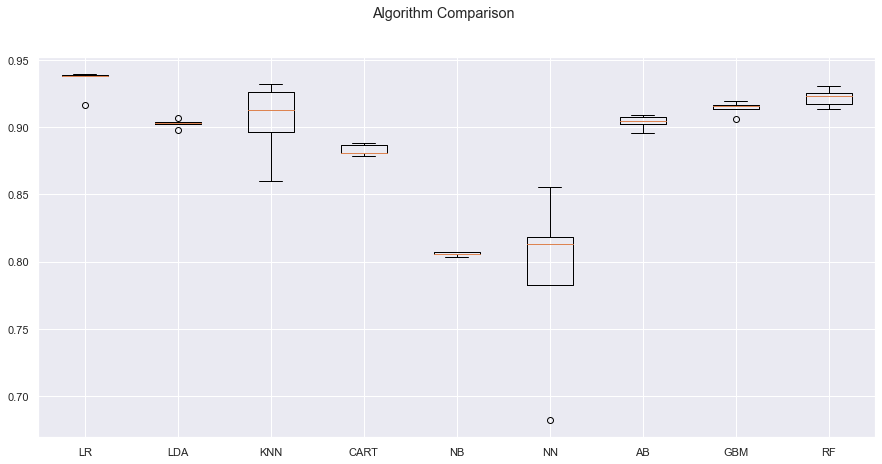

In [141]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(15,7)
plt.show()

In [143]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

n_estimators = [20, 80]
max_depth = [5, 10]
criterion = ["gini", "entropy"]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth, criterion=criterion)

# Initialize TimeSeriesSplit
num_folds = 5  # Define the number of splits
ts_split = TimeSeriesSplit(n_splits=num_folds)

# Set up GridSearchCV
model = RandomForestClassifier(n_jobs=-1)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=ts_split)
grid_result = grid.fit(rescaledX, Y_train)

# Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.912101 using {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 80}
#7 0.883211 (0.002822) with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 20}
#5 0.884512 (0.002649) with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 80}
#4 0.910015 (0.002480) with: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 20}
#2 0.911905 (0.004094) with: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 80}
#8 0.882155 (0.005561) with: {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 20}
#6 0.884217 (0.002504) with: {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 80}
#3 0.910383 (0.004548) with: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 20}
#1 0.912101 (0.004667) with: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 80}


In [144]:
# prepare model
model = RandomForestClassifier(criterion='entropy', n_estimators=80,max_depth=10,n_jobs=-1)
#model = LogisticRegression()

model.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=80,
                       n_jobs=-1)

In [145]:
# estimate accuracy on validation set
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.912794502617801
[[5232  544]
 [ 522 5926]]
              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91      5776
         1.0       0.92      0.92      0.92      6448

    accuracy                           0.91     12224
   macro avg       0.91      0.91      0.91     12224
weighted avg       0.91      0.91      0.91     12224



<Axes: xlabel='Predicted', ylabel='Actual'>

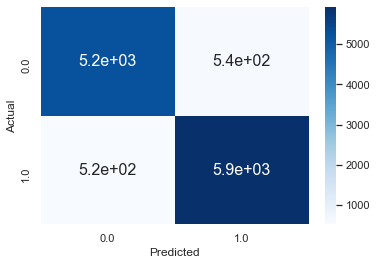

In [146]:
df_cm = pd.DataFrame(confusion_matrix(Y_validation, predictions), columns=np.unique(Y_validation), index = np.unique(Y_validation))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

Text(0.5, 0, 'Variable Importance')

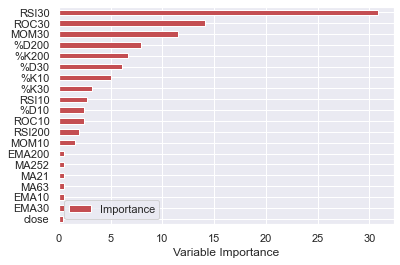

In [147]:
Importance = pd.DataFrame({'Importance':model.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r' )
plt.xlabel('Variable Importance')

<Axes: >

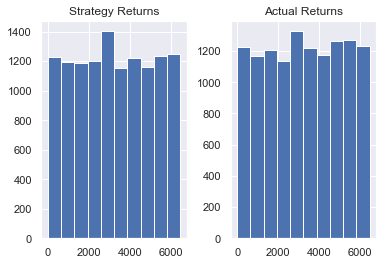

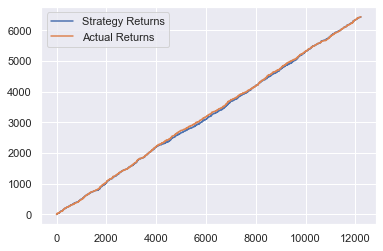

In [149]:
#Create column for Strategy Returns by multiplying the daily returns by the position that was held at close
#of business the previous day
backtestdata = pd.DataFrame(index=X_validation.index)

backtestdata['signal_pred'] = predictions
backtestdata['signal_actual'] = Y_validation
backtestdata['Market Returns'] = X_validation['close'].pct_change()
backtestdata['Actual Returns'] = backtestdata['Market Returns'] * backtestdata['signal_actual'].shift(1)
backtestdata['Strategy Returns'] = backtestdata['Market Returns'] * backtestdata['signal_pred'].shift(1)
backtestdata=backtestdata.reset_index()

backtestdata[['Strategy Returns','Actual Returns']].cumsum().hist()
backtestdata[['Strategy Returns','Actual Returns']].cumsum().plot()